<a href="https://colab.research.google.com/github/javier-jaime/Tool-Crib/blob/master/Colab/Word_Count_with_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [28]:
!pip install wordcloud
!pip install pysrt
import pysrt

from google.colab import drive
from google.colab import files

import collections

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Read the Data from a srt file extracted from youtube

In [10]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# open file from google drive with pysrt
subs = pysrt.open('drive/MyDrive/Colab Notebooks/Datasets/LWOL, March 30, 2022.srt')

# Print Text in file
# for sub in subs:
#    print(sub.text)

In [40]:
# if you want to use you own stopwords, read file from Google Drive
stopwords = set(line.strip() for line in open('drive/MyDrive/Colab Notebooks/Datasets/stopwords'))

# create your data structure here.
wordcount={}

# Instantiate a dictionary, and for every word in the file, add to 
# the dictionary if it doesn't exist. If it does, increase the count.

# Hint: To eliminate duplicates, remember to split by punctuation, 
# and use case demiliters. The functions lower() and split() will be useful!

for word in subs.text.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

# after building your wordcount, you can then sort it and return the first
# n words.  If you want, collections.Counter may be useful.

d = collections.Counter(wordcount)

#print(d.most_common(50))
for word, count in d.most_common(50):
	print(word, ": ", count)

um :  132
uh :  88
people :  68
really :  52
us :  36
slide :  33
next :  31
start :  30
one :  30
please :  29
time :  29
want :  28
little :  28
bit :  28
mental :  28
health :  28
actually :  27
going :  25
make :  24
network :  22
things :  22
trying :  22
able :  22
app :  22
now :  20
way :  19
back :  16
right :  15
take :  15
help :  15
brain :  15
idea :  14
anyone :  14
lot :  14
try :  14
workplace :  14
well :  13
rainforest :  13
know :  13
around :  13
yeah :  13
good :  13
might :  13
adhd :  13
focus :  13
first :  12
got :  12
also :  12
will :  12
thank :  11


Create a Word Cloud

In [41]:
# Uncomment to read directly from a txt file
# subs_text = open('LWOL-March-30.txt', 'r').read() 

In [42]:
# Import stopwords from wordcloud or comment to use your own
stopwords = set(STOPWORDS)

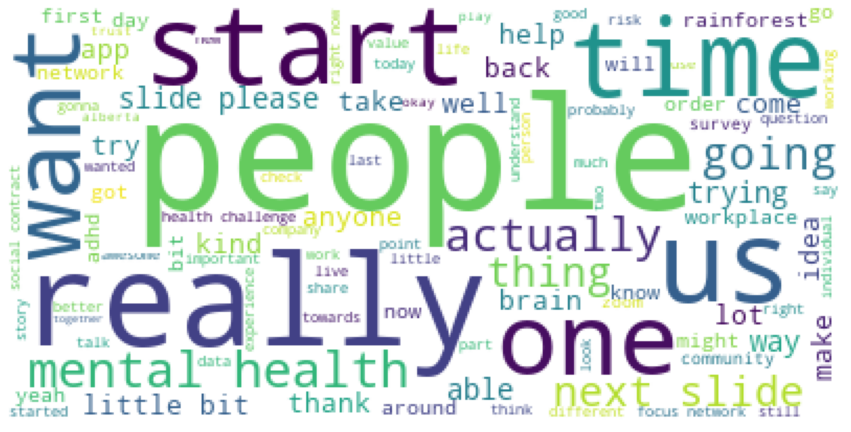

In [43]:
# instantiate a word cloud object
wc = WordCloud(
    background_color='white',
    max_words=100,
    stopwords=stopwords
)

# add new words to stopwords
stopwords.add('um')
stopwords.add('uh')

# generate the word cloud
wc.generate(subs.text)

fig = plt.figure()
fig.set_figwidth(15) # set width
fig.set_figheight(20) # set height

# display the word cloud
plt.imshow(wc)
plt.axis('off')
plt.show()